<a href="https://colab.research.google.com/github/iramustika27/Pemrograman_Python/blob/main/TUBES_SKO_IRA_MUSTIKASARI(1101180424)_TT_42_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ira Mustikasari

NIM : 1101180424

Kelas: TT-42-07

Perancangan FTTB:

Pada peracncangan FTTB yaitu berawal dari sentral ke ODF dilanjutkan ke ODC lalu ke ODP kemudian ke Roset. Satu gedung berisikan 40 lantai, diamana setiap lantainya memiliki 20 kamar. Berdasarkan rencana tersebut maka akan digunakan 6 konektor dan 2 spliter, menggunnakan spliter 1:64 dengan redaman 19.5 dB untuk ODC ke ODP dan spliter 1:32 dengan redaman 16 dB untuk ODP ke Roset. Saya menggunakan fiber jenis G625D dengan panjang gelombang 1490 nm serta redaman 0.28 dB/Km. Terdapat jumlah konektor 6 dan 2 splitter, maka splicer ada 8 buah yang memiliki redaman 0.1 db. Saya akan menganalisis lantai 8 sesuai dengan absen saya.


In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ODP = 15 km
#jarak dari ODP ke Roset = <500 m --> 5*8 = 40 m 
#jarak total = 15000 + 40 = 15040 m

d = np.arange(0.040,15.041,1) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [4]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-38.1112 -38.3912 -38.6712 -38.9512 -39.2312 -39.5112 -39.7912 -40.0712
 -40.3512 -40.6312 -40.9112 -41.1912 -41.4712 -41.7512 -42.0312 -42.3112]


In [5]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [1.31310340e-04 1.23111586e-04 1.15424746e-04 1.08217856e-04
 1.01460950e-04 9.51259322e-05 8.91864599e-05 8.36178363e-05
 7.83969064e-05 7.35019609e-05 6.89126460e-05 6.46098787e-05
 6.05757675e-05 5.67935382e-05 5.32474636e-05 4.99227989e-05]


In [6]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [9.12123245e-10 8.01776870e-10 7.04779922e-10 6.19517421e-10
 5.44569763e-10 4.78689083e-10 4.20778483e-10 3.69873761e-10
 3.25127364e-10 2.85794274e-10 2.51219602e-10 2.20827687e-10
 1.94112509e-10 1.70629266e-10 1.49986967e-10 1.31841921e-10]


In [7]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[25.48587084 24.92774089 24.36949492 23.81114007 23.25268307 22.69413023
 22.13548746 21.57676034 21.01795408 20.45907358 19.90012345 19.341108
 18.78203127 18.22289708 17.66370898 17.10447033]


In [8]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[9.40293743 8.81773513 8.26884308 7.75402163 7.27116764 6.81830643
 6.39358403 5.99525999 5.62170055 5.27137222 4.94283572 4.6347403
 4.34581834 4.07488032 3.8208101  3.5825604 ]


In [9]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.49014909e-18 2.88879275e-16 2.94686379e-14 1.70872175e-12
 6.02761847e-11 1.37322802e-09 2.12964627e-08 2.35474438e-07
 1.93348634e-06 1.22197960e-05 6.13488111e-05 2.51544632e-04
 8.63155335e-04 2.53250864e-03 6.47443511e-03 1.46640959e-02]


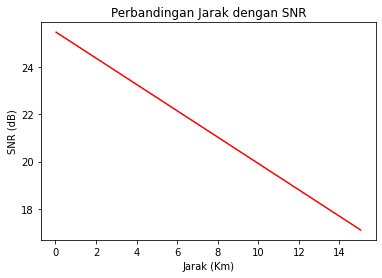

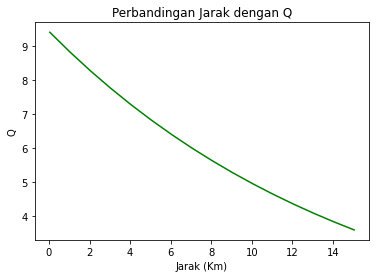

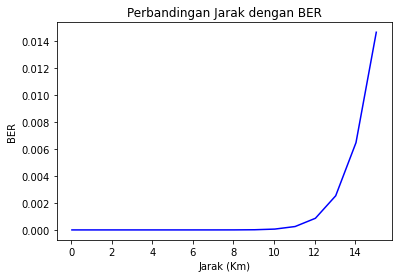

In [10]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()